# Basic about the ROS(Robotic operating system)

### The Ros is very important in Autonomous Drones, and Robots, here we will learn how to use ROS basictlly.

**ALL the documentation from BILIBILI:https://www.bilibili.com/video/BV1zt411G7Vn/?spm_id_from=333.1387.homepage.video_card.click**

### What is ROS

Ros is the name of robotic operating system, which has two models, one is publisher and subscriber, one is server and user. We mostly use the publish->subscribe for use.


Ros can communicate with PX4, wake GAZEBO, so know how to use ROS can know how to use GAZEBO.


The Ros, however change the version with Ubuntu, but the core point of ROS maintained alot, so learn one version of basic, and learn how to use special pakage of ROS helps alot.

## The Command Line of ROS

There are few important commands can be used in ROS, introduce here one by one

### 1.`roscore` 

Start the ROS master, which is like a net-bridge that tranform data between ROS nodes.

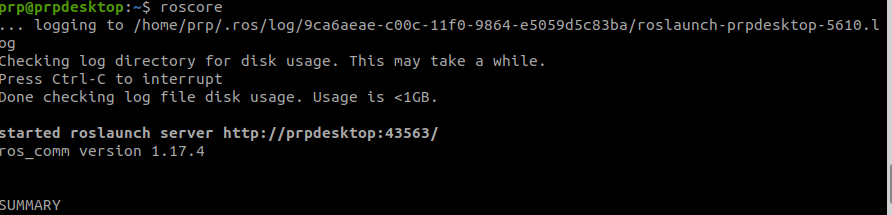

### 2.`rosrun <pakage_name> <node_type>`

To start a ROS node based on this package of this type

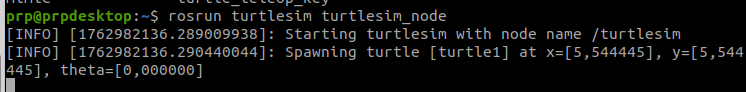

### 3. `rqt_graph`

To create a graph and show how is the ROS service stucture

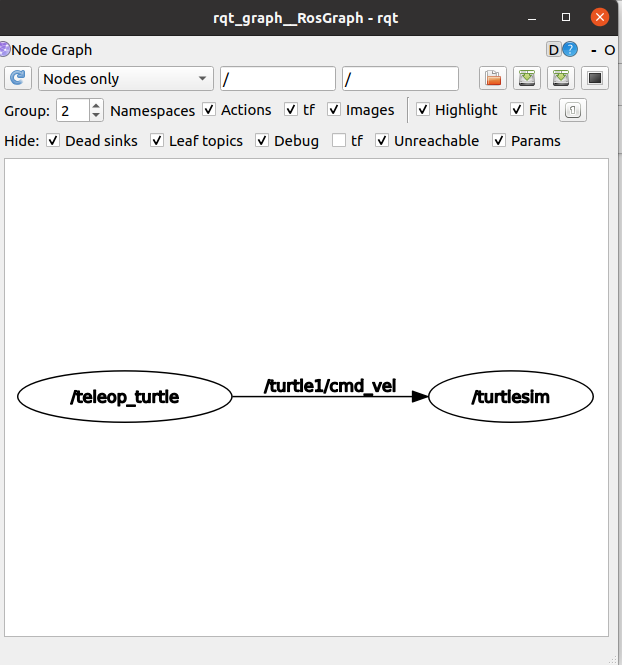

This picture shows the node teleop_turtle control turtleslm by the topic turtle1/cmd_vel

In ROS, there are a series of tools name started by rqt, this means a series of GUI tools dictionary 

### 4. Series of ROS Tools, started by ros

These are command line tools, the result can be only seen in command line

#### `rosnode`

To show every node's information in system, just type `rosnode`, and can get the help page

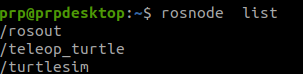

In this picture, there's  `/rosout`, it will always shown while we start the `roscore`

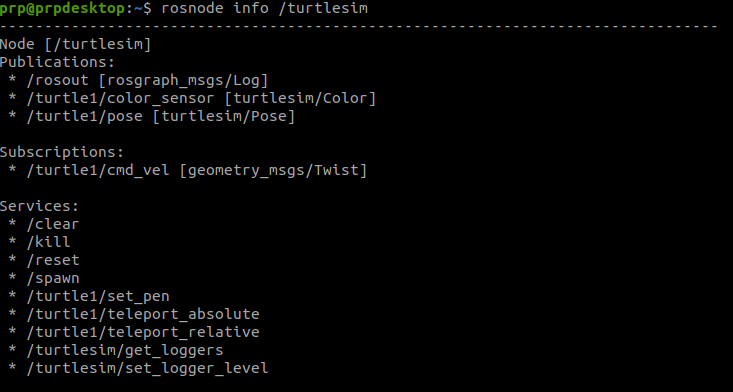

In this picture, it shows what this node publish and what this node subscribe, also shows what service inside this node

`rostopic`

To show every node's topic in system, just type `rostopic`, and can get the help page

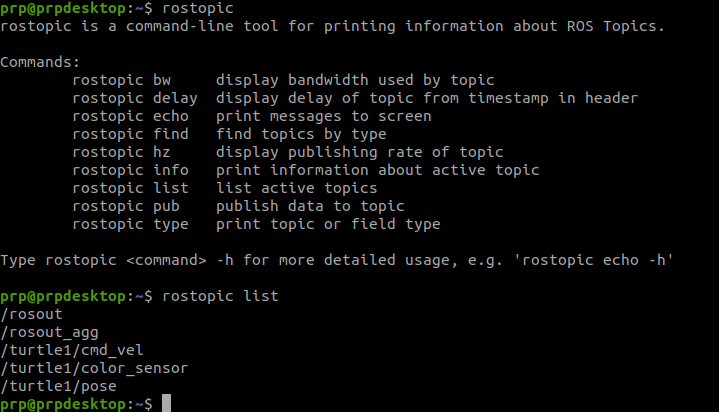

In this picture, `rostopic list` shows how many topic we have and what's the name of them

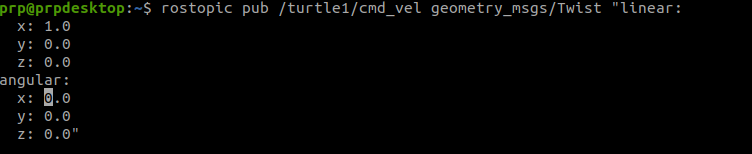

In this picture, `rostpoic pub` is for publish a secific topic with data, the text before `/Twist` is the topic name and after `/Twist` is data. Also the systax is like: `rostopic pub </tpoic_name> </message_name>` 

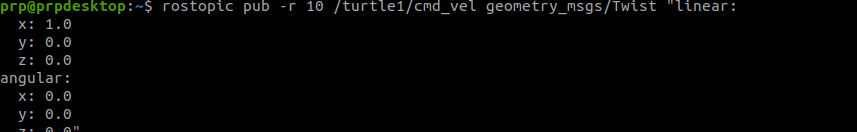

Here added the `-r 10`, repeat 10 times each second, the flashing rate is 10hz

`rosmsg`

To show informations about ros messages, just type `rosmsg` and will give instructions of how to use `rosmsg`

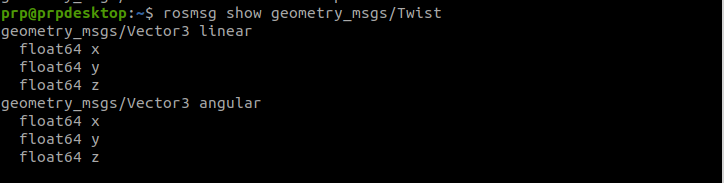

In this message, shows how to get message format information. Use `rosmsg show <message_name>`

`rosservice`

To show services which running inside all the ros node now

Here can use `rosservice` to show what can do

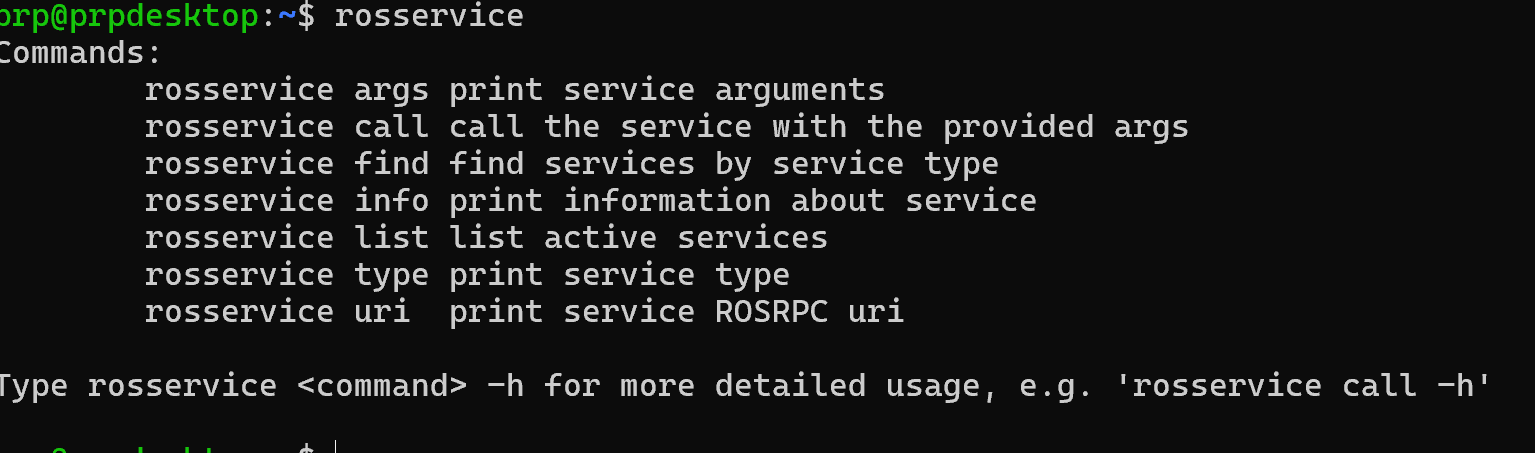

`rosservice list` to show list of rosservices, services is similar to topics, but use tcp, and has backmessages

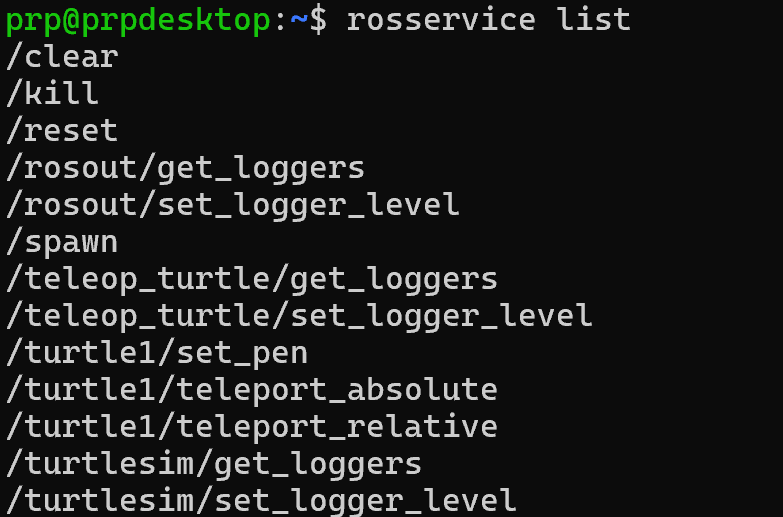

`rosservice call <service_name> parameters` to call any services, parameters' syntax can be shown by **double click TAB**

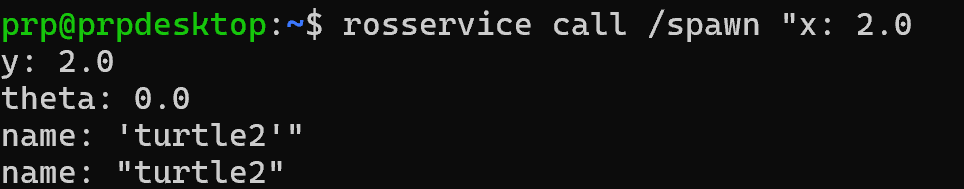

Here's result

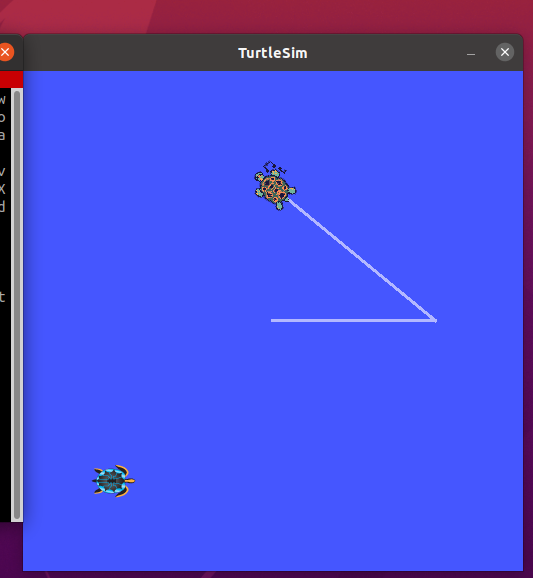

`rosbag` 

Can save and reseen topics in command ROS system

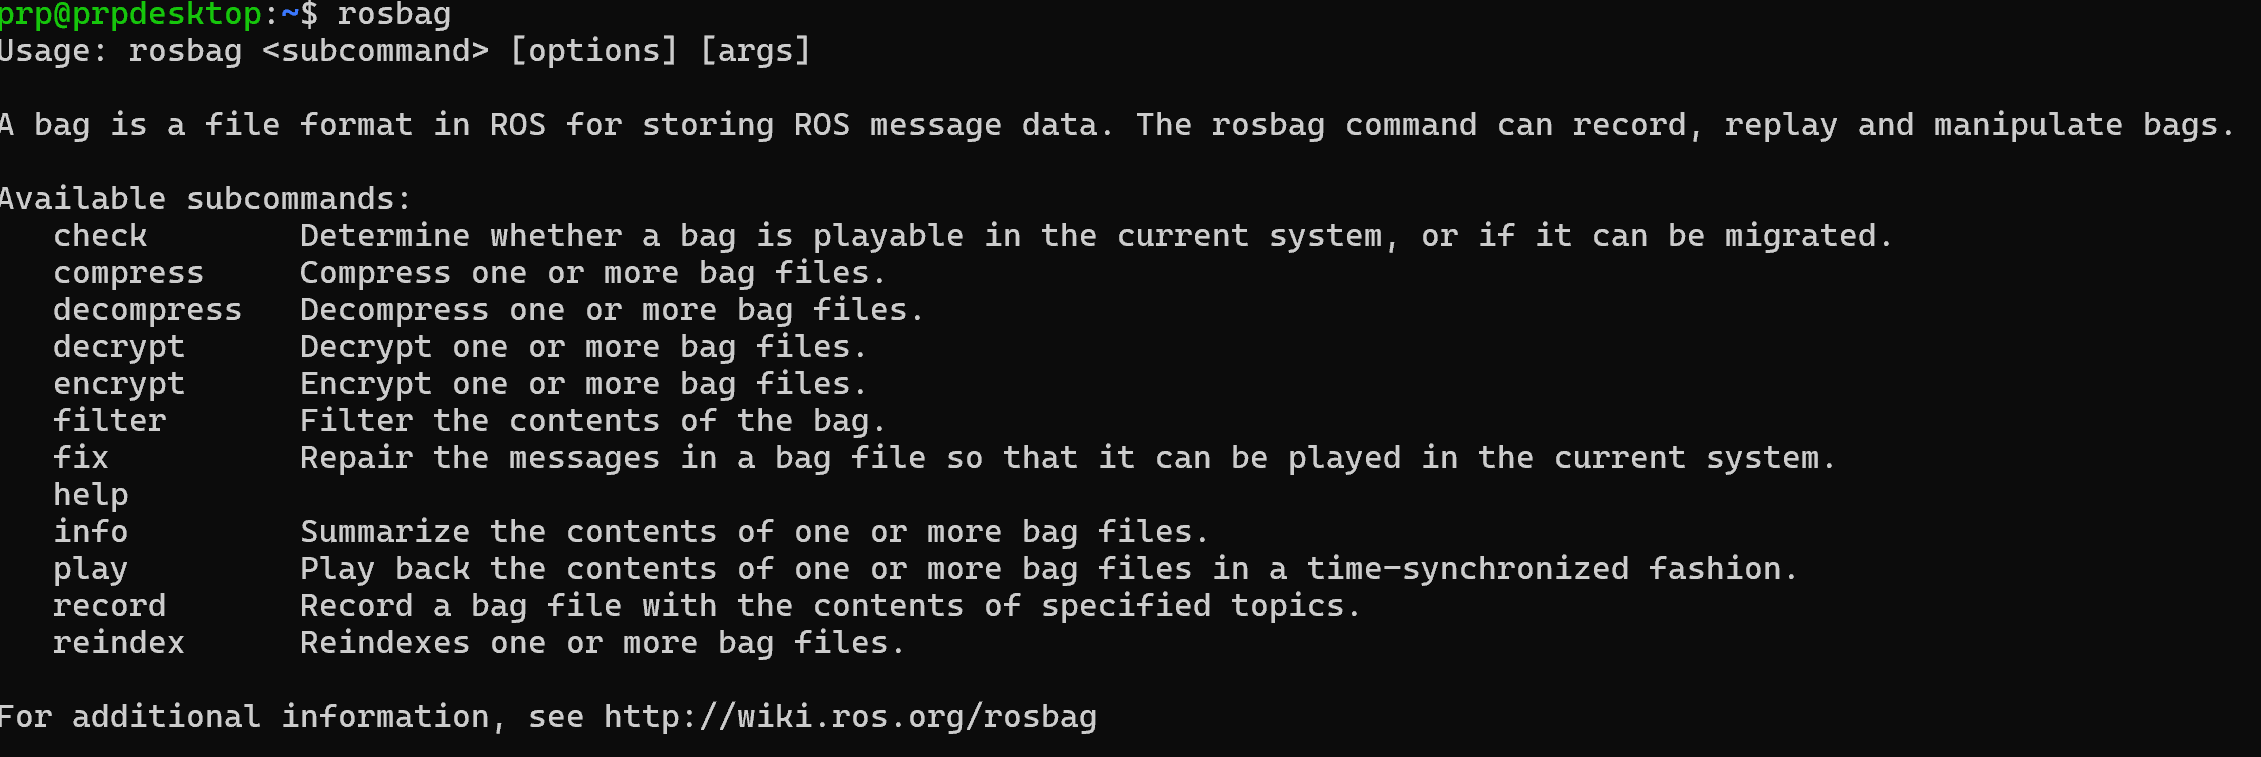

`rosbag record -a -O <zipfile_name_of_record>`

To start recording topics data and save it as a zip file, a means all, O means output

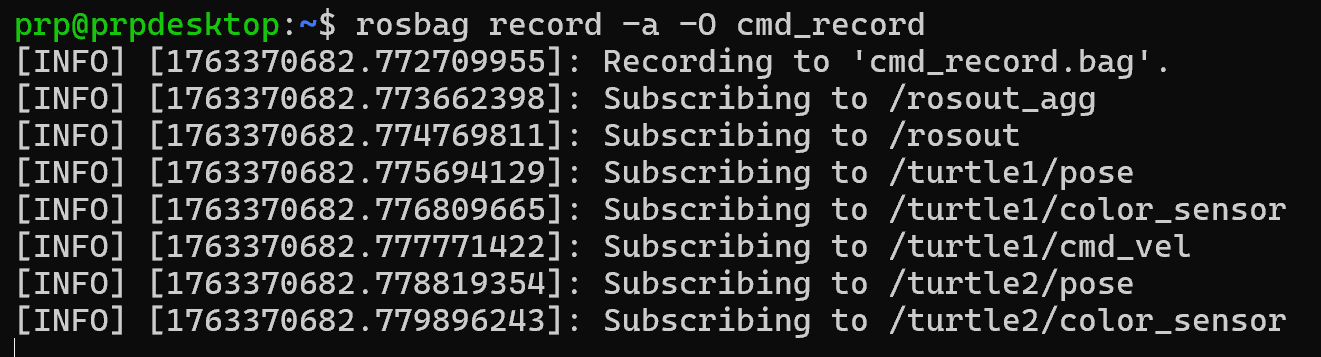

After all data been recorded, use **ctrl+c** to stop, the file will automatically saved into /home

`rosbag play <record_file_name>`

To reuse dataset we create, we can start roscore and see inside simulators

The bahavious of our robot should be same as recorded bag

## The work spase of ROS

What is a work space

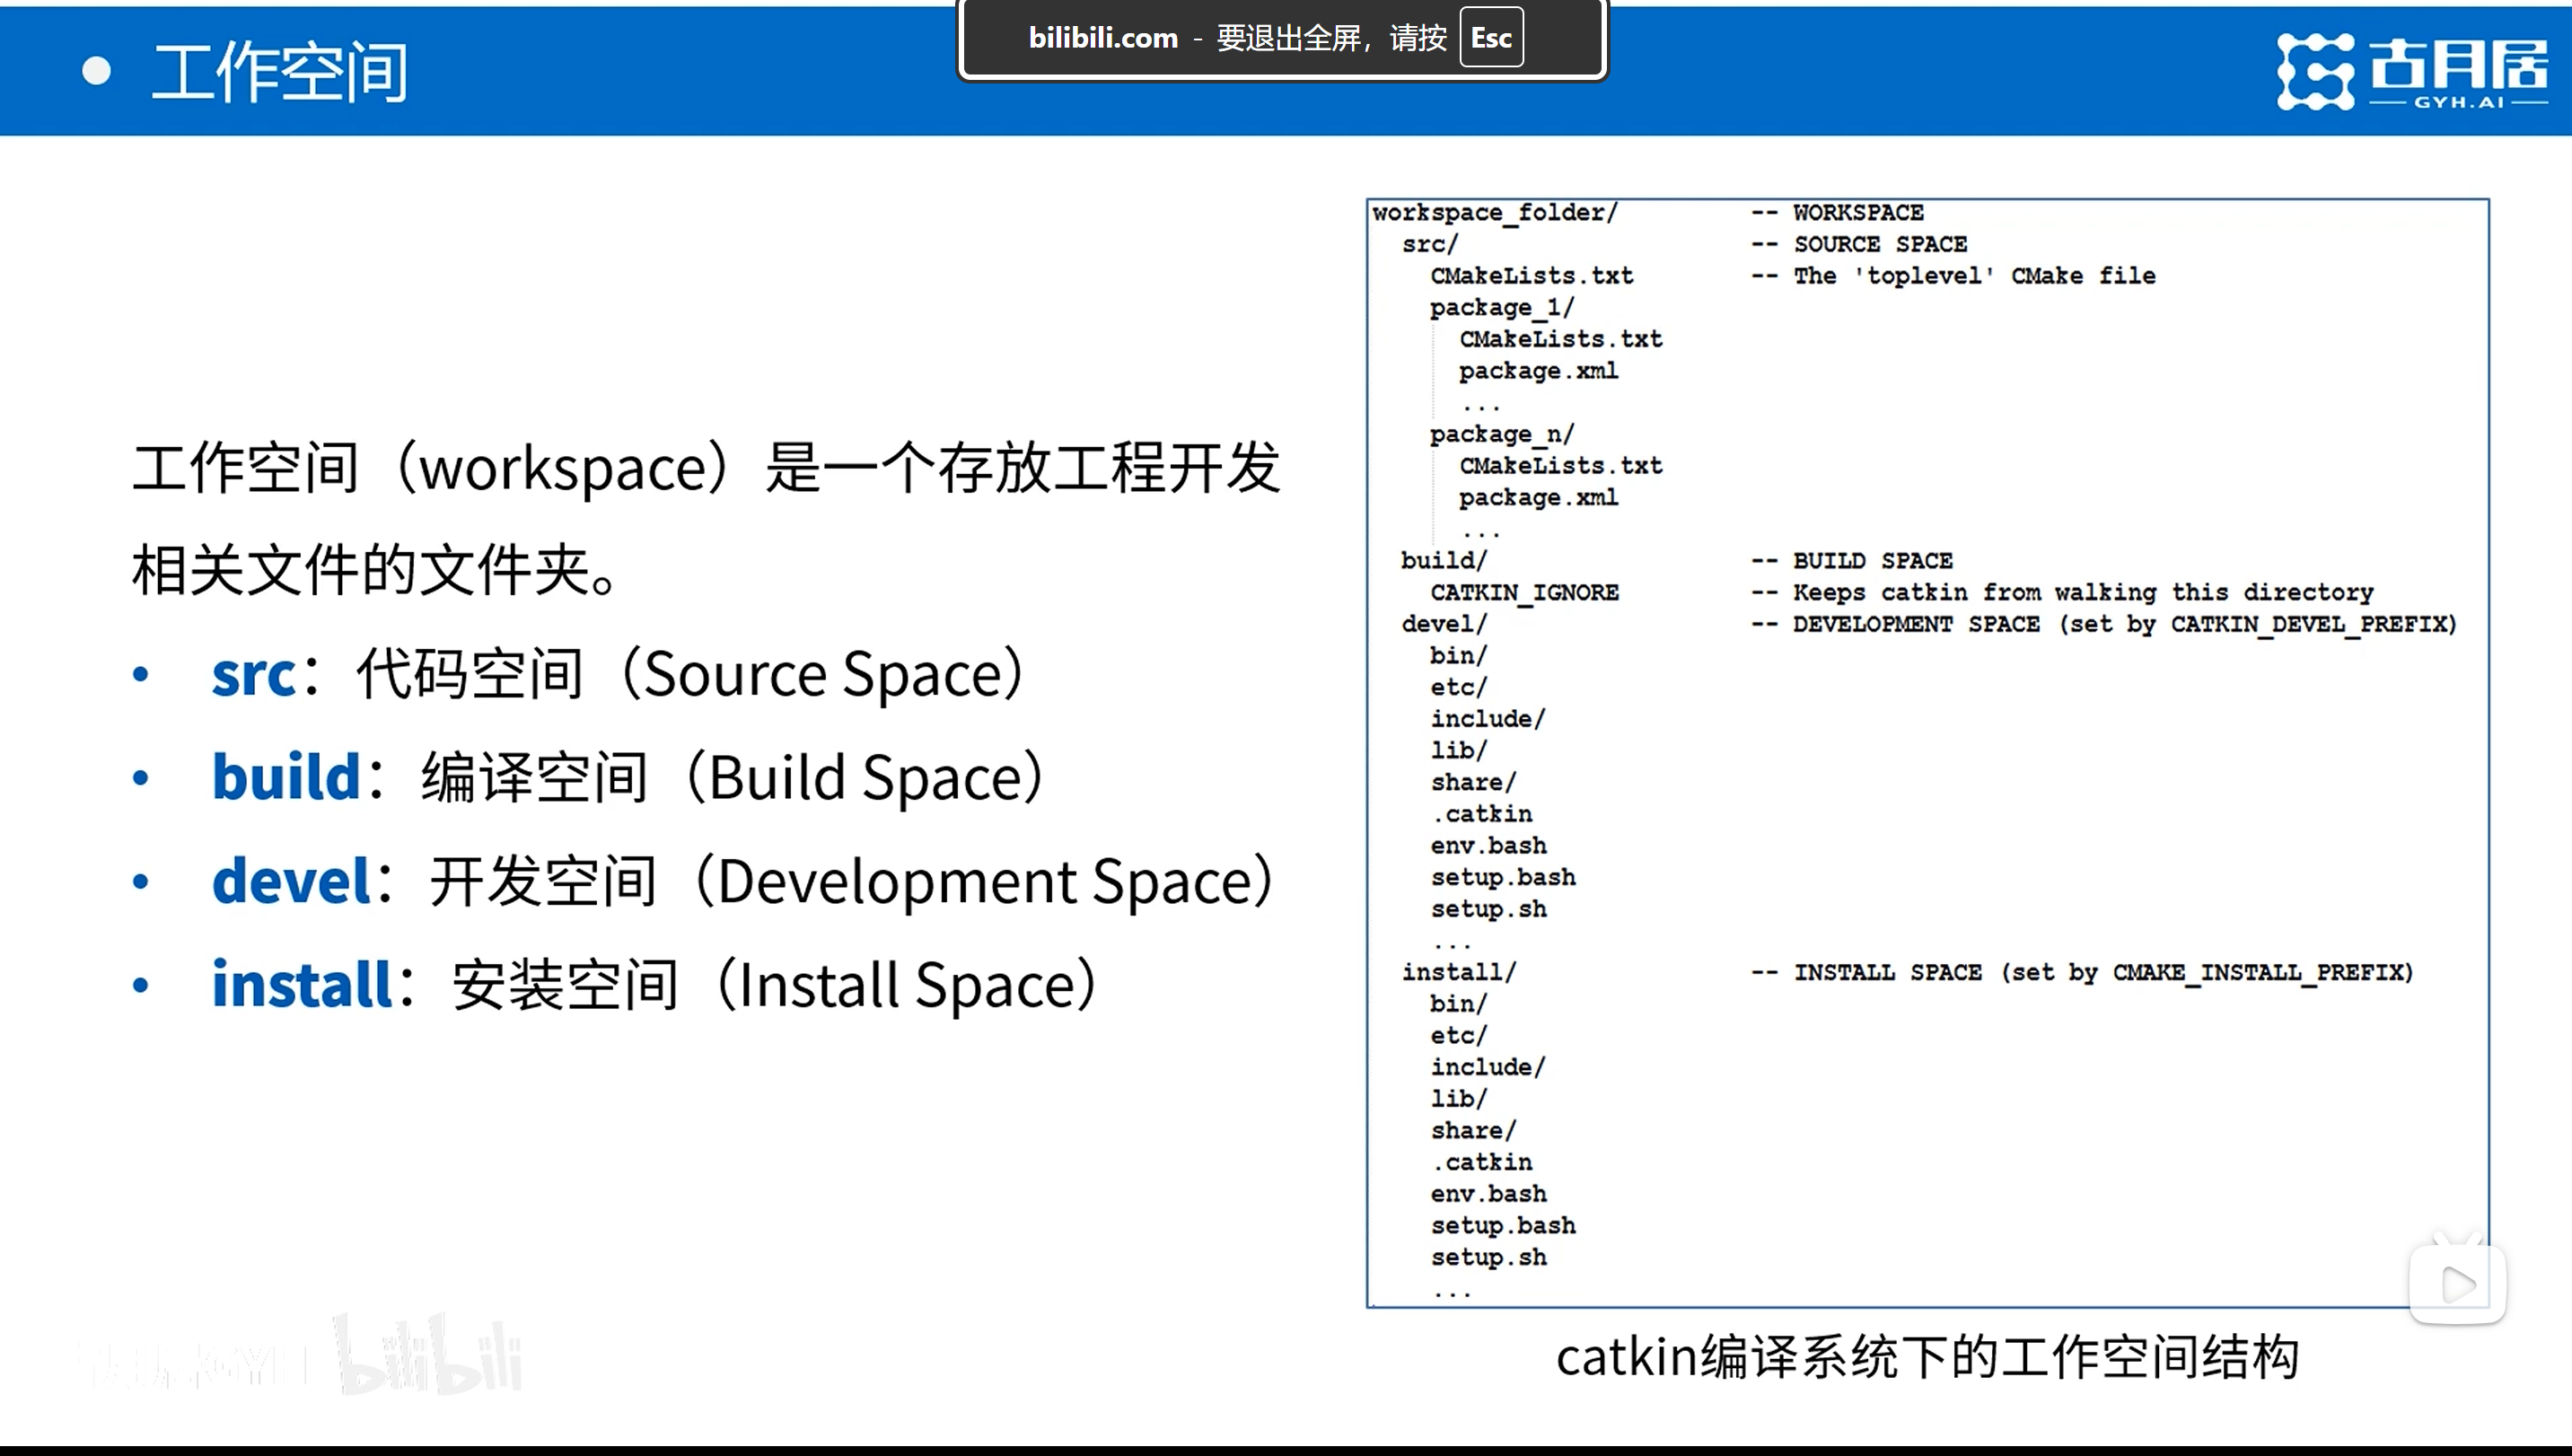

How to create a work space

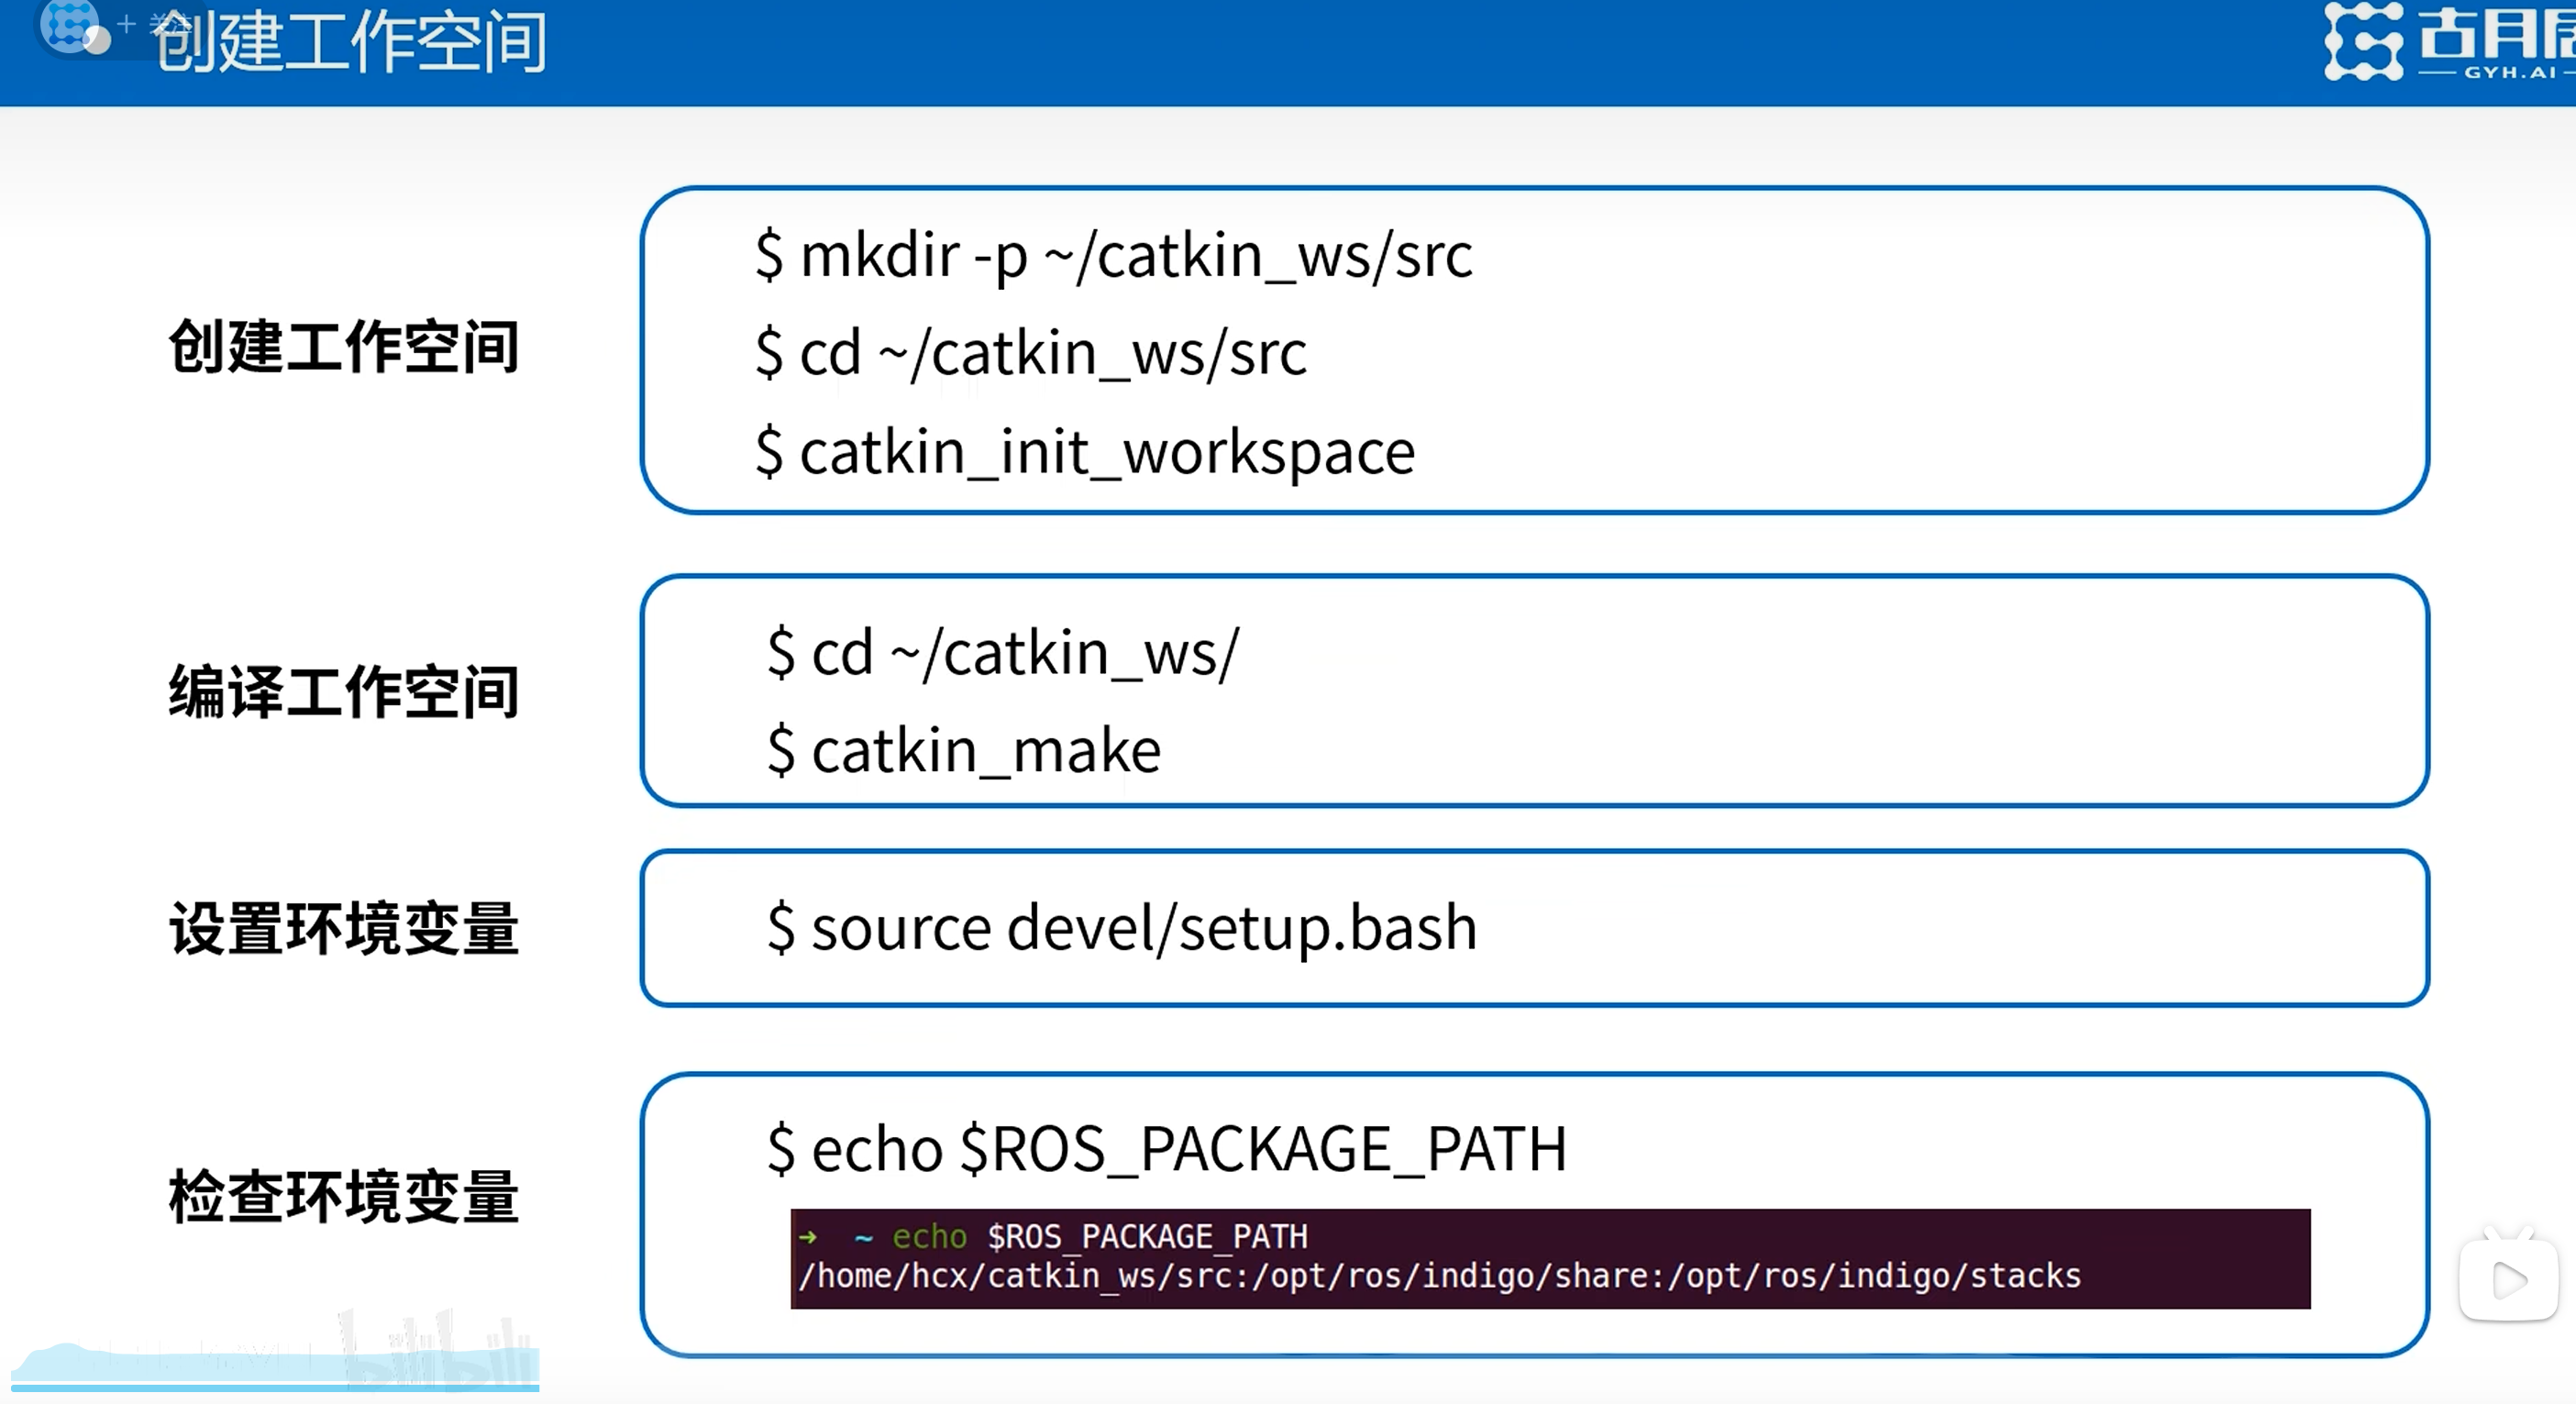

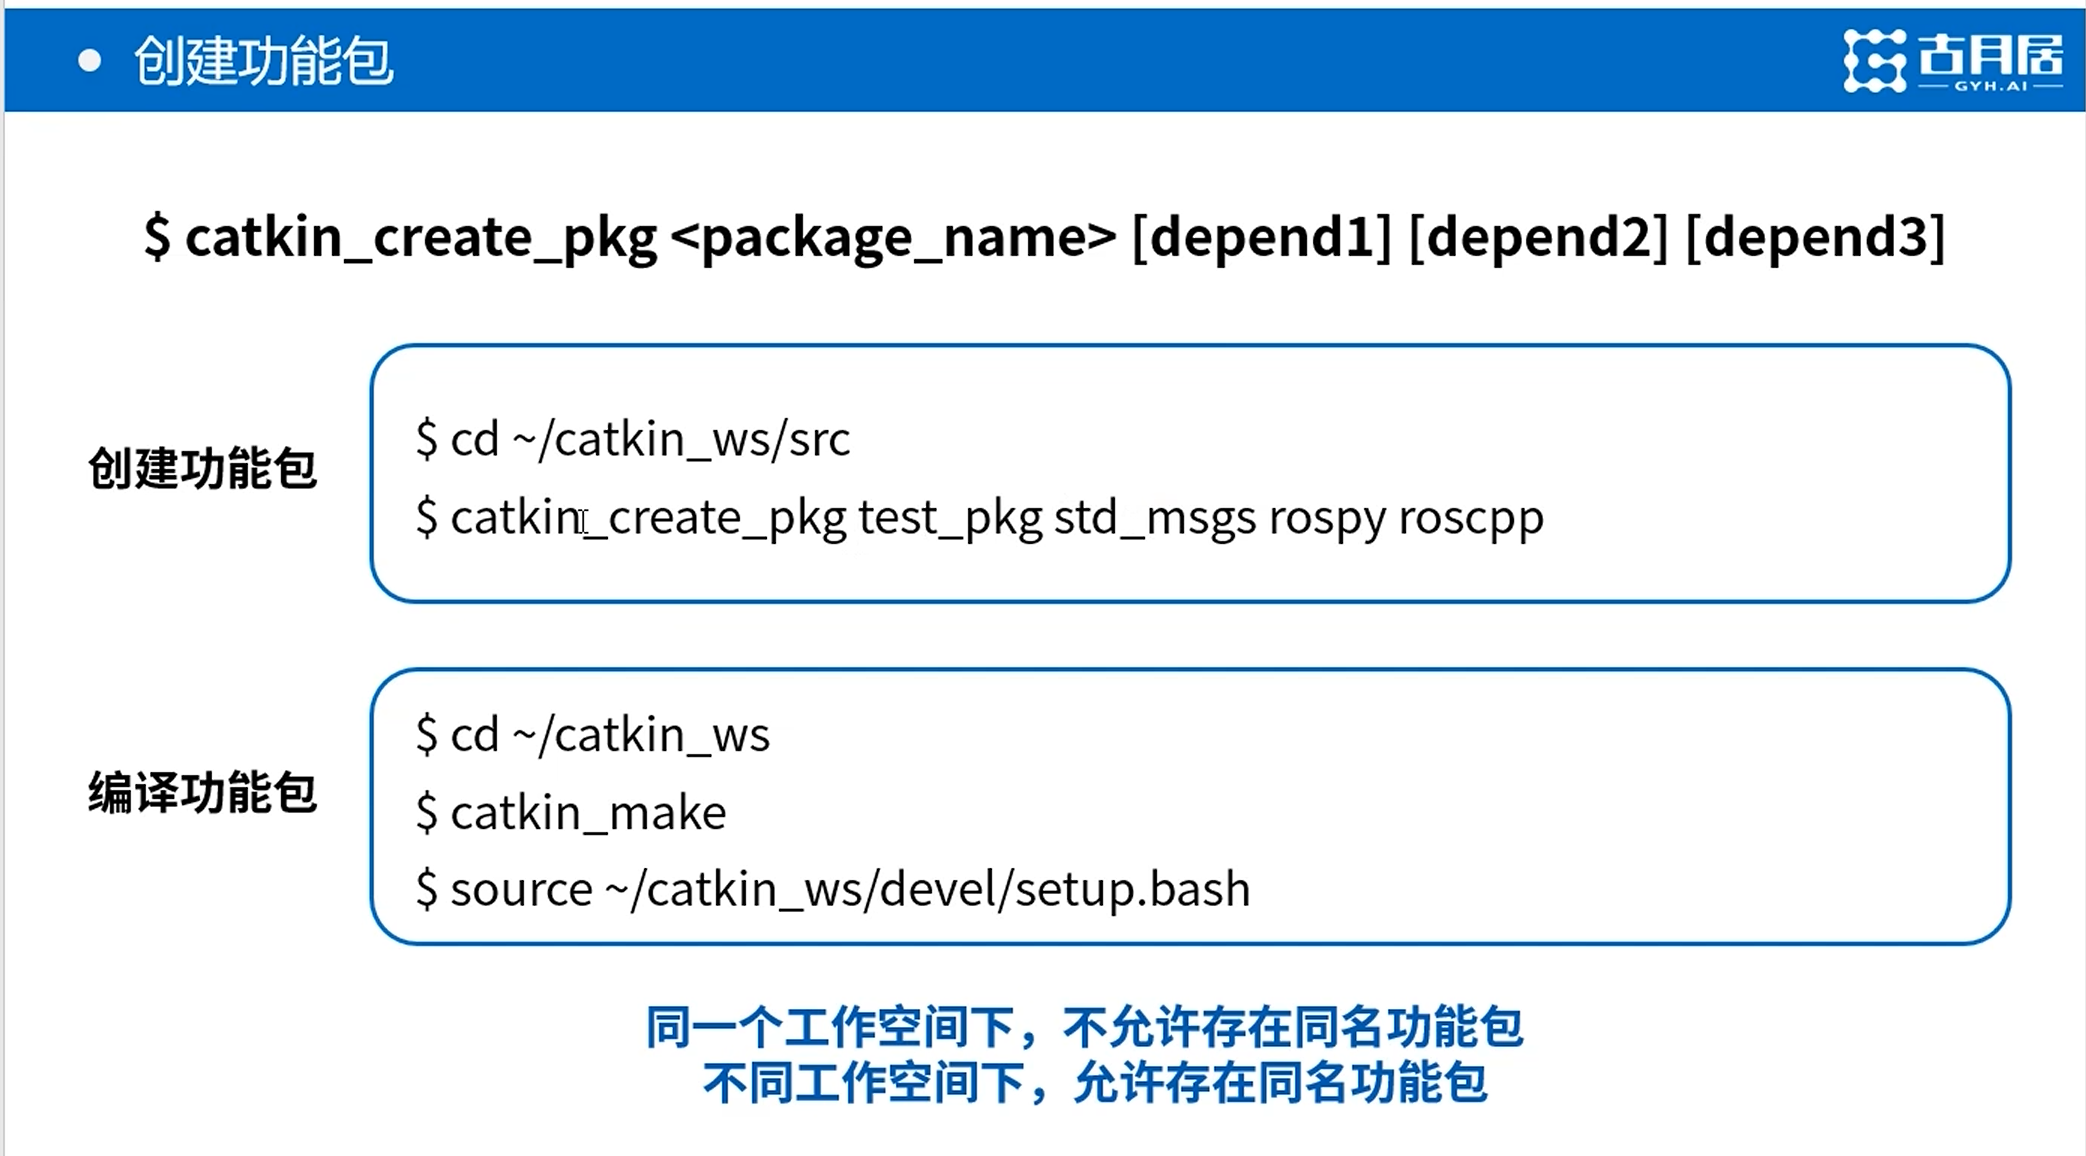

### To create a work space, we need to know:

1. We need to create the directory of work space, create a workspace file, the name **can be any name**, the default is `catkin_ws`

2. All the work space directory need to have a **src** file, to store source code

3. Need to dived inside the /src then use command `catkin_init_workspace` to initialize work space

4. After init is down, move back to home directory of workspace, and run `catkin_make`

5. Run `catkin_make install` to create directory install

6. Create own function pakages inside work space 

### For create function pakages, we need put them inside /src, but no possible to create same name funtion pakages in same workspace

**ALL the code can't be directly in /src, they should be inside function pakages, the function pakages are minimum unit of code in ROS**

TO create Function pakages:

1. Move to the `/src` file.

2. Use `catkin_create_pkg <pakgage_name> <depend1> <depend2> ...` to create function pakages

   

To see what we have created:

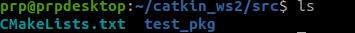

If move into test_pkg, we can see there's `/src`, this is for source code, like c++, python, the `/include` is for header file

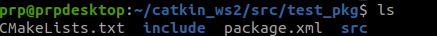

`CmakeLists.txt` and `pakage.xml` are **required** files we need for a pakage in ROS.



### After create a funtion pakage, we need compilation the function pakage

To compilation:

1. Move to work space directory.

2. Then running `catkin_make`.

3. To set environment variable, running the `source devel/setup.bash`

4. To check the environment, running `echo $ROS_PACKAGE_PATH`

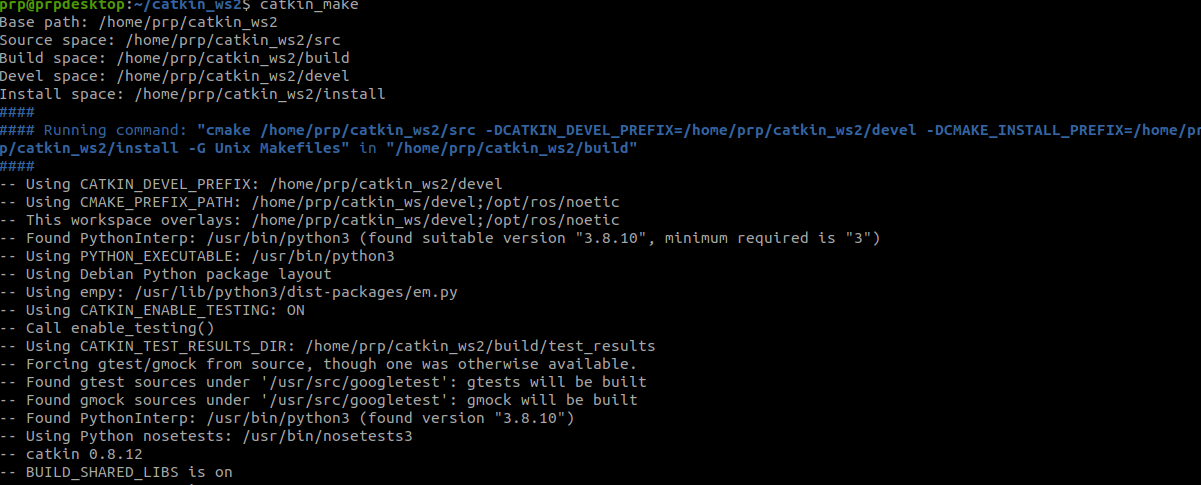

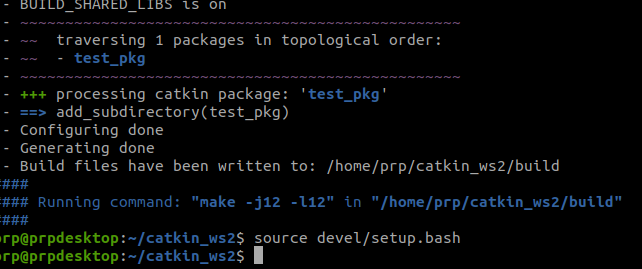

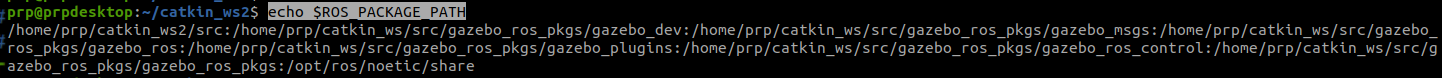

### The usage of 2 required files in pakages

1. pakages.xml: Nessesary messages of this function pakage. Also the dependences of pakages.

2. CmakeLists.txt: To describe syntax of compilation

## Coding For publisher

Publisher will publish topics then the subscriber can subscribe it

**Be aware all source code should be inside work spaces**

### First, create a pakage named "learning_topic"

We need to add the name of depend pakages inside, take a look at:




The mearning of all depends:

1. roscpp: To create a ros node by C++.

2. rospy: To create a ros node by python.

3. std_msgs: Ros standard messages, all the standard messages can be found here.

4. geometry_msgs: Provides robotic situation imformations, need to use while using robotics.

5. turtlesim: Official turtle simulator

### Then, we need to write the stratorgy of Starting ROS node

Here is one example:

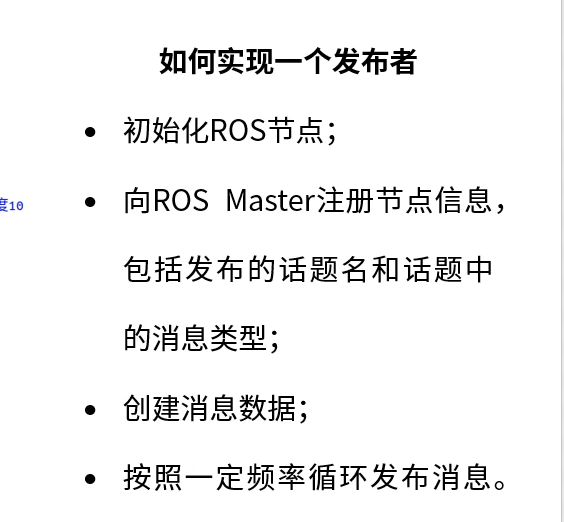

Here we use the python for developing

**Important things to know if using C++**

1. Before everything, need to set environment variables(**source working_directory/devel/setup.bash**)

2. All the code need to compilation before running(catkin_make)

3. Before compilation need to change the CMakeList file

**Put frequently used command in .bashrc can skip every time opening bash and reset environmentle variables**

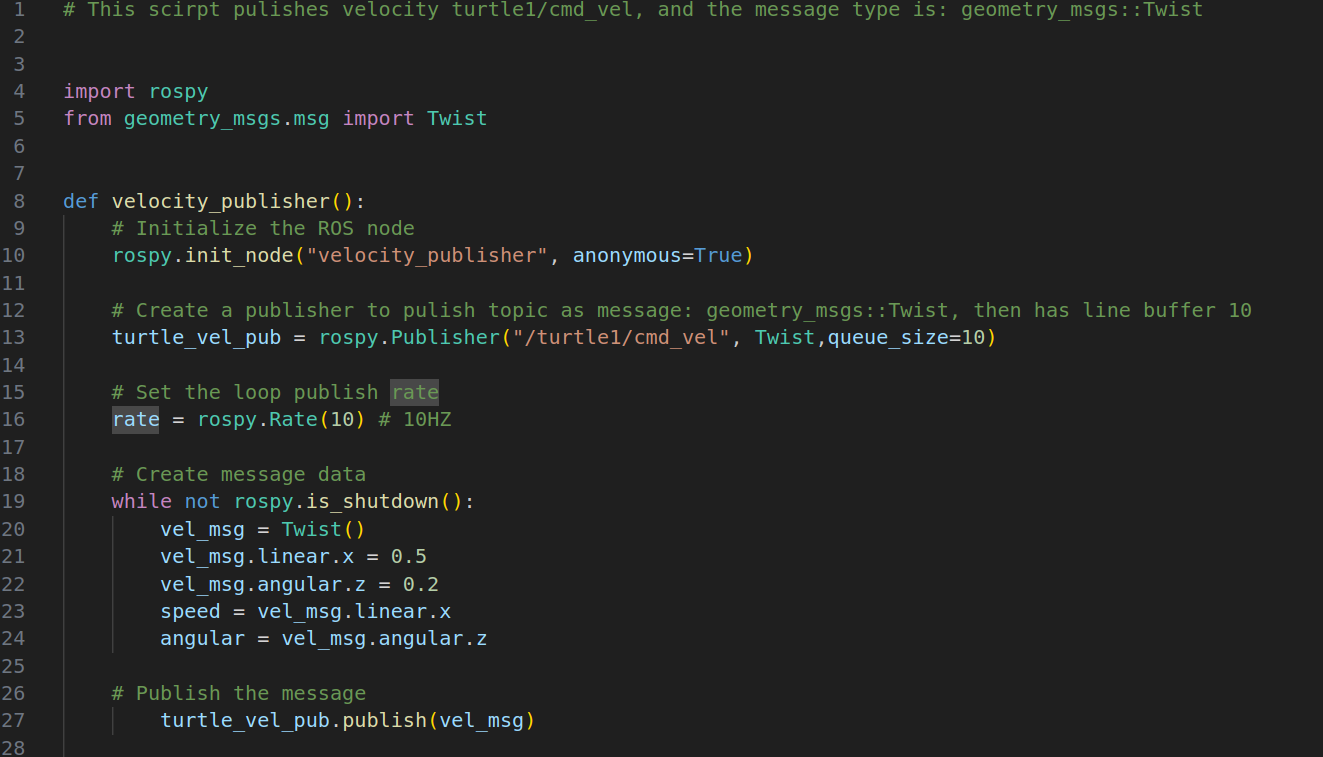

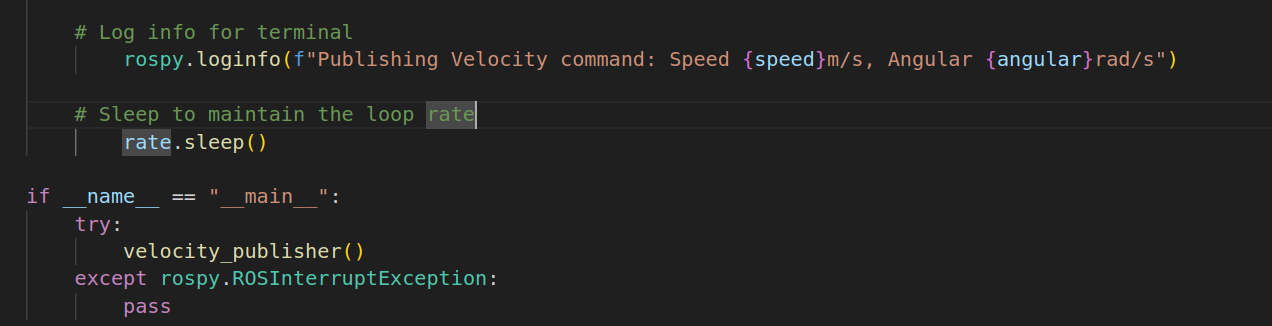

**Be very careful about what should inside while and what should outside the function**

To test:

1. run `roscore`

2. run `rosrun turtlesim turtlesim_node`

3. run the python file created, but need to take care of file permitions. Can use `rosrun <pakage_name> <python_script>` or `python <python_script>`

## Coding for Suscriber

How can use the rospy to implement a subscriber?

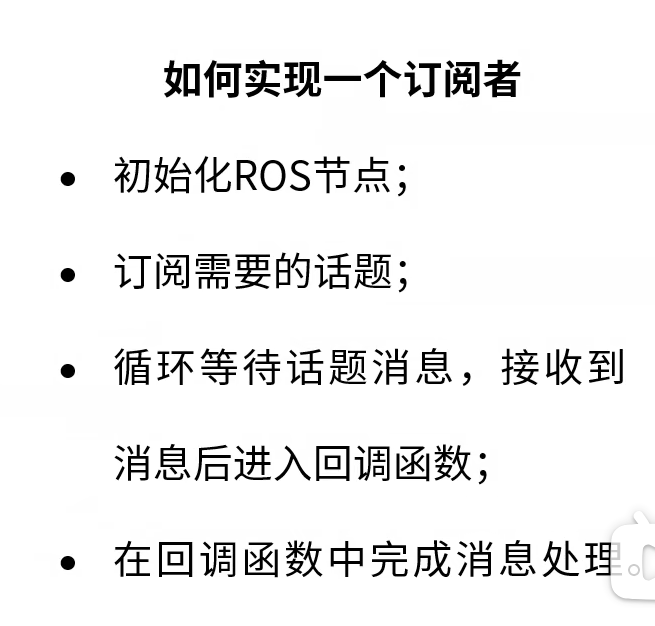

1. Initialze a node.

2. Subscribe the topics we need.

3. Keep waiting the messages, while recerived the messages calling the callback function.

4. Done the message processing in callback.

The `Callback` function is actually a listener, it listening every messages and do the actions wrriten inside this function. To use the while for keep listening is costy, using the callback function is much more efficient

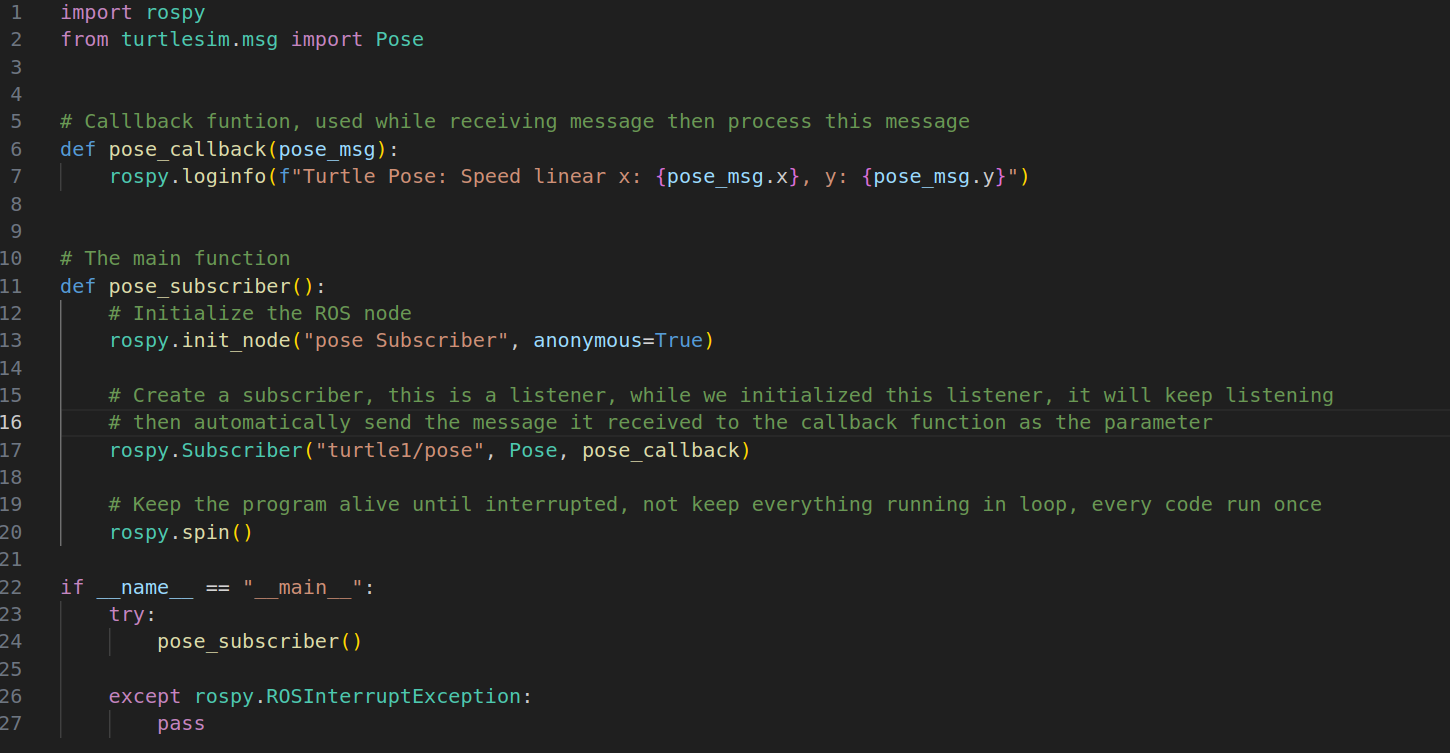

**Plese noticed the Subscriber will keep receive messages from publisher and send it to callback function**